In [15]:
import numpy as np
from projected_rsd import ProjectedSpectra
import camb
from camb import model
from matplotlib import pyplot as plt
from math import pi as pi
from matplotlib import pyplot as plt

In [16]:
#define the parameters
param_dict = {
	'h0'  : 0.67,
	'omb' : 0.04 / 0.67 ** 2.,
	'omm' : (0.315) / 0.67 ** 2.,
	'mnu' : 0.,
	'omk' : 0.,
	'tau' : 0.08,
	'w0'  : -1.,
	'wa'  : 0.,
	'As'  : 2e-9,
	'sigma8' : 0.8,
	'ns'  : 0.96,
	'b'   : 1.5,
	'f' : 0.81,
	'sigma_v': 5.1,


}


scale_dict = {
	'nk':10000,
	'kmin':1e-4,
	'kmax':10.,
	'n_ell':50,
	'lmin':10.,
	'lmax':1000. 
}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=22)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=14)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)


##narrow bins
mn, mx = 0.5, 0.75


grid_shp = 10000
z = np.linspace(mn, mx, grid_shp)



nz_survey = np.ones(grid_shp)
n_gals = 1e20
weight_func_list = []
rsd_model = 'Kaiser Gauss FOG'
f_sky = 0.3
alt_rsd_model = 'Kaiser Lorentz FOG'
sigma8_rescale = True
harmonic_weight = True
n_int_sub_divs = 5
n_sub_div = 1	
sigma_z = 0.001

In [17]:
#compute distances in a fiduction cosmology
pars = camb.CAMBparams()
pars.set_cosmology(H0 = param_dict['h0'] * 100., ombh2=param_dict['omb'] * param_dict['h0'] ** 2., omch2=(param_dict['omm'] - param_dict['omb']) * param_dict['h0'] ** 2., mnu=param_dict['mnu'], omk=param_dict['omk'], tau=param_dict['tau'])
pars.set_dark_energy(w=param_dict['w0'], wa=param_dict['wa'])
results = camb.get_results(pars)
chi = results.comoving_radial_distance(z)
chi_fid = chi.copy()

In [18]:
# Do the calculation
weight = nz_survey

weight_func_list += [weight]

#these are the eta values
m_list = [ 3., 5., 10., 15., 20.]
weight = nz_survey
weight_func_list += [weight]



spec = ProjectedSpectra(param_dict, z, chi_fid, nz_survey, n_gals, weight_func_list, m_list, rsd_model, alt_rsd_model,sigma8_rescale, n_int_sub_divs, harmonic_weight, sigma_z, scale_dict, None)
spec.do_cosmo_calc()
spec.compute_rad_kernel_dict()
l = spec.ell
# convert back to h/Mpc for plotting
k = spec.k_nonlin / 0.67
d = spec.kernel_dict




Normalising the Survey Window
Rescaling A_s to get correct sigma_8
Computing nonlinear power spectrum
Computing the radial efficency kernels


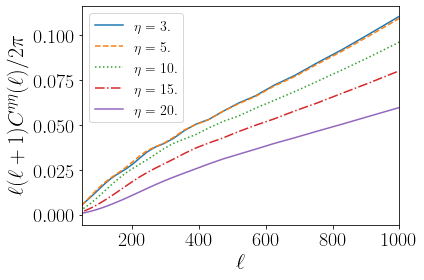

In [19]:
cl1 = spec.get_spectra(0,0)
cl2 = spec.get_spectra(1,1)
cl3 = spec.get_spectra(2,2)
cl4 = spec.get_spectra(3,3)
cl5 = spec.get_spectra(4,4)



plt.plot(l, l * (l+1.) * cl1 / 2 / pi, label = '$\\eta = 3.$', linestyle = '-'  )
plt.plot(l, l * (l+1.) * cl2 / 2 / pi, label = '$\\eta = 5.$', linestyle = '--' )
plt.plot(l, l * (l+1.) * cl3 / 2 / pi, label = '$\\eta = 10.$', linestyle = ':' )
plt.plot(l, l * (l+1.) * cl4 / 2 / pi, label = '$\\eta = 15.$', linestyle = '-.'  )
plt.plot(l, l * (l+1.) * cl5 / 2 / pi, label = '$\\eta = 20.$', linestyle = '-' )

plt.legend()


plt.xlim(50,1000)

plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C^{\eta \eta}(\ell)/ 2 \pi$')
#plt.title('$\Delta  z = 0.1$')
plt.tight_layout()
plt.savefig('plots/cl_harm.pdf', bbox= 'tight')




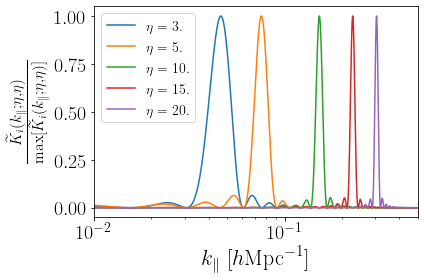

In [22]:
plt.plot(k, d['00'] / d['00'].max(), label = '$\\eta = 3.$')
plt.plot(k, d['11'] / d['11'].max(), label = '$\\eta = 5.$')
plt.plot(k, d['22'] / d['22'].max(), label = '$\\eta = 10.$')
plt.plot(k, d['33'] / d['33'].max(), label = '$\\eta = 15.$')
plt.plot(k, d['44'] / d['44'].max(), label = '$\\eta = 20.$')
plt.xlim(1e-2,0.5)
plt.legend()
plt.xlabel('$k_\parallel \ [h {\\rm Mpc}^{-1}]$')
plt.ylabel('$\\frac{\widetilde K_i(k_\parallel;\eta,\eta)}{ {\\rm max} [\widetilde K_i(k_\parallel;\eta,\eta)]}$')
plt.xscale('log')
plt.tight_layout()
plt.savefig('plots/k2.pdf', bbox= 'tight')


